In [1]:
import sys
import os

# Add the current working directory to sys.path
sys.path.append(os.path.abspath('..'))

# Print sys.path to verify the change
print(sys.path)

['/home/lpr/project_nattabude/carla/self-driving-sb3/notebook', '/home/lpr', '/home/lpr/miniconda3/envs/TRT86/lib/python38.zip', '/home/lpr/miniconda3/envs/TRT86/lib/python3.8', '/home/lpr/miniconda3/envs/TRT86/lib/python3.8/lib-dynload', '', '/home/lpr/miniconda3/envs/TRT86/lib/python3.8/site-packages', '/home/lpr/project_nattabude/carla/self-driving-sb3']


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("../recorded/SAC_9/infos.csv")

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4002 entries, 0 to 4001
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   step               4002 non-null   int64  
 1   location           4002 non-null   object 
 2   reward             4002 non-null   float64
 3   total_reward       4002 non-null   float64
 4   distance           4002 non-null   float64
 5   total_distance     4002 non-null   float64
 6   speed              4002 non-null   float64
 7   avg_speed          4002 non-null   float64
 8   steer              4002 non-null   float64
 9   mean_reward        4002 non-null   float64
 10  reason             0 non-null      float64
 11  color              4002 non-null   object 
 12  angular velocity   4002 non-null   float64
 13  centrifugal force  4002 non-null   float64
 14  maneuver           4002 non-null   object 
dtypes: float64(11), int64(1), object(3)
memory usage: 469.1+ KB


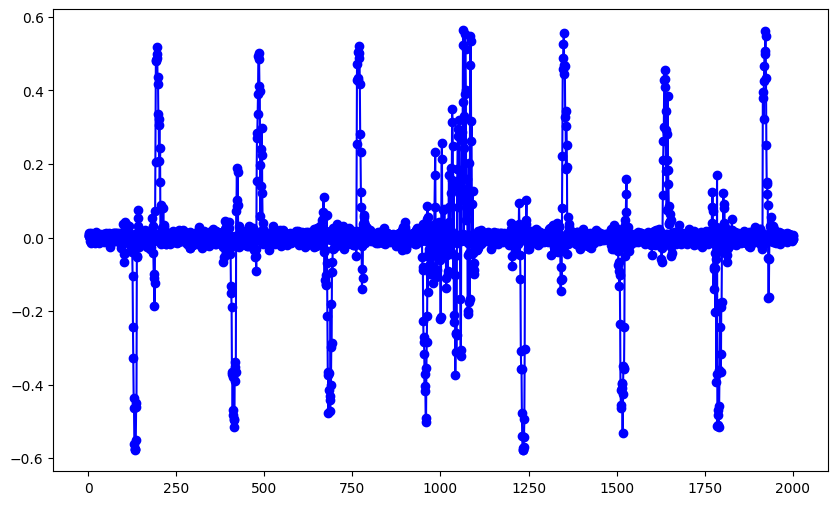

In [5]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(df['step'], df['steer'], marker='o', linestyle='-', color='b')


<Axes: xlabel='steer', ylabel='Count'>

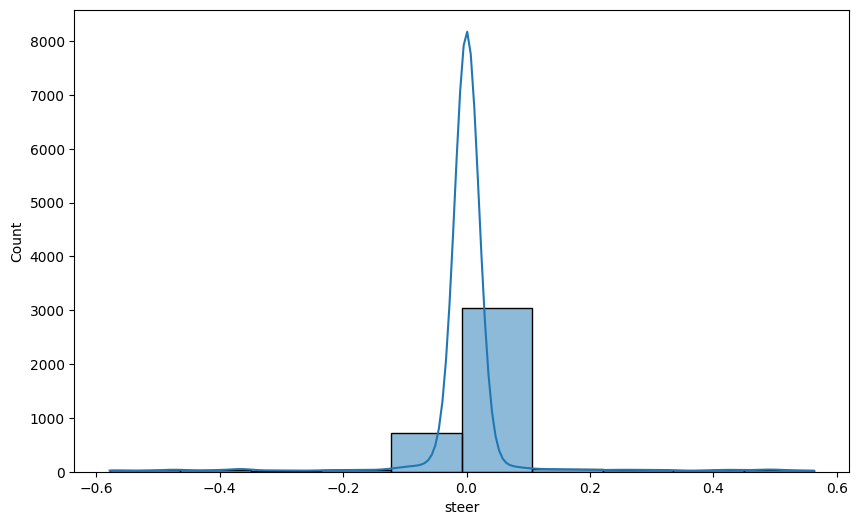

In [51]:
# find dist
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['steer'], kde=True, bins=10)

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
def outlier_count(col, data = df):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))
    
    return min_val,max_val

In [17]:
low_line,high_line=outlier_count("steer", data = df)


---------------steer---------------

Number of outliers: 538
Percent of data that is outlier: 13.44%


In [ ]:
def remove_outliers_list( col2drop, range_dict,data):
    for col in col2drop:
        data = data[(data[col] >= range_dict[col][0]) & (data[col] <= range_dict[col][1])]
    return data

In [35]:
high_line,low_line

(0.025937430560588667, -0.02503137141466124)

In [37]:
outliers = df[((df['steer'] >= high_line) | (df['steer'] <= low_line))]

In [39]:
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 538 entries, 62 to 3943
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   step               538 non-null    int64  
 1   location           538 non-null    object 
 2   reward             538 non-null    float64
 3   total_reward       538 non-null    float64
 4   distance           538 non-null    float64
 5   total_distance     538 non-null    float64
 6   speed              538 non-null    float64
 7   avg_speed          538 non-null    float64
 8   steer              538 non-null    float64
 9   mean_reward        538 non-null    float64
 10  reason             0 non-null      float64
 11  color              538 non-null    object 
 12  angular velocity   538 non-null    float64
 13  centrifugal force  538 non-null    float64
 14  maneuver           538 non-null    object 
dtypes: float64(11), int64(1), object(3)
memory usage: 67.2+ KB


<Axes: xlabel='steer', ylabel='Count'>

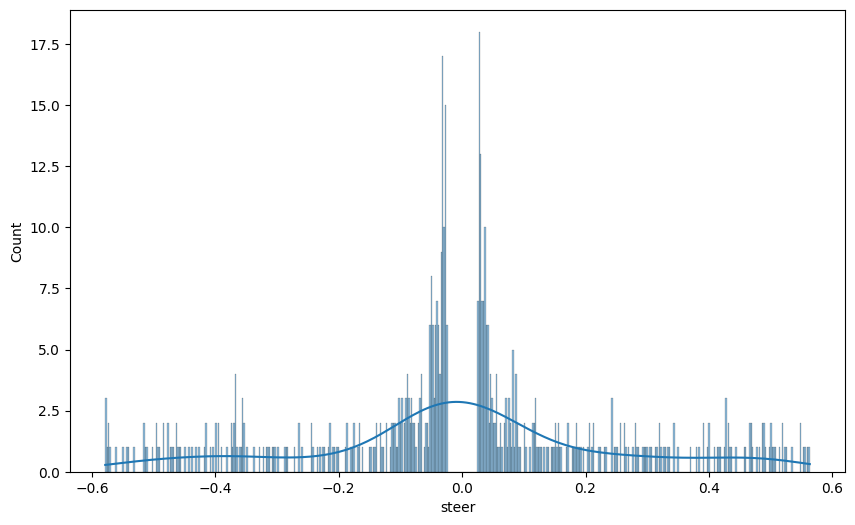

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(outliers['steer'], kde=True, bins=500)

In [43]:
forward_steer = df[((df['steer'] < high_line) & (df['steer'] > low_line))]

In [44]:
forward_steer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3464 entries, 0 to 4001
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   step               3464 non-null   int64  
 1   location           3464 non-null   object 
 2   reward             3464 non-null   float64
 3   total_reward       3464 non-null   float64
 4   distance           3464 non-null   float64
 5   total_distance     3464 non-null   float64
 6   speed              3464 non-null   float64
 7   avg_speed          3464 non-null   float64
 8   steer              3464 non-null   float64
 9   mean_reward        3464 non-null   float64
 10  reason             0 non-null      float64
 11  color              3464 non-null   object 
 12  angular velocity   3464 non-null   float64
 13  centrifugal force  3464 non-null   float64
 14  maneuver           3464 non-null   object 
dtypes: float64(11), int64(1), object(3)
memory usage: 433.0+ KB


<Axes: xlabel='steer', ylabel='Count'>

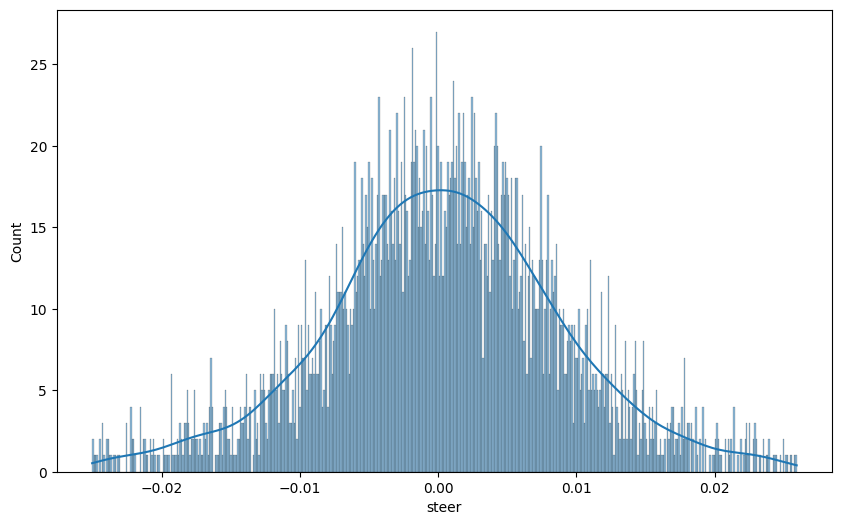

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(forward_steer['steer'], kde=True, bins=500)

In [47]:
from scipy.signal import find_peaks, savgol_filter

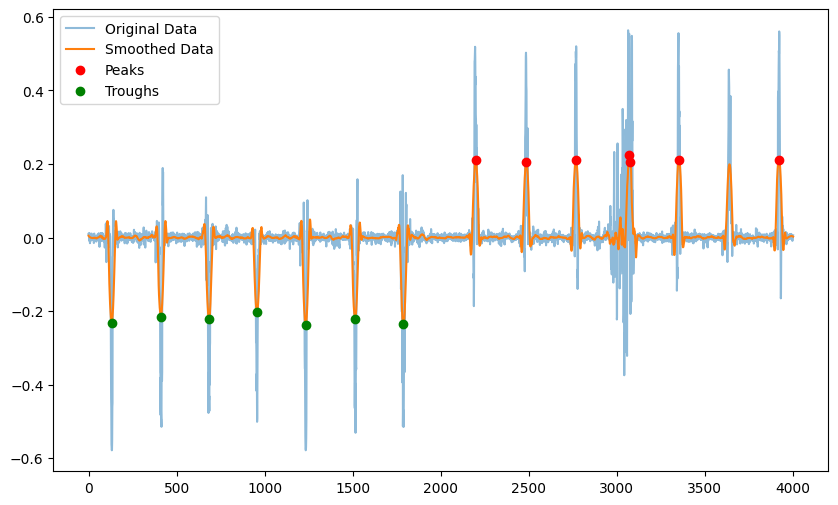

Peak Durations: [29, 28, 28, 27, 30, 28, 29, 29, 28, 30, 29, 28, 27, 30]
Trough Durations: [29, 28, 28, 27, 30, 28, 29, 29, 28, 30, 29, 28, 27, 30]


In [96]:
# Apply a smoothing filter
smoothed_data = savgol_filter(df["steer"], window_length=51, polyorder=3)
# smoothed_data = df["steer"]
# Detect peaks
peaks, _ = find_peaks(smoothed_data, height=0.2)  # Adjust height as needed
troughs, _ = find_peaks(-smoothed_data, height=0.2)  # Adjust height as needed

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df["steer"], label='Original Data', alpha=0.5)
plt.plot(smoothed_data, label='Smoothed Data')
plt.plot(peaks, smoothed_data[peaks], 'ro', label='Peaks')
plt.plot(troughs, smoothed_data[troughs], 'go', label='Troughs')
plt.legend()
plt.show()

# Calculate duration of peaks and troughs and extract data
def calculate_durations_and_extract_data(data,target_data, threshold):
    durations = []
    data_segments = []
    in_peak = False
    start_index = None
    
    for i in range(len(data)):
        if in_peak:
            if abs(data[i]) < threshold:
                durations.append(i - start_index)
                data_segments.append(target_data[start_index:i])
                in_peak = False
                start_index = None
        else:
            if abs(data[i]) >= threshold:
                in_peak = True
                start_index = i
                
    return durations, data_segments

peak_durations, peak_data_segments = calculate_durations_and_extract_data(smoothed_data,df["steer"], threshold=0.1)  # Adjust threshold as needed
trough_durations, trough_data_segments = calculate_durations_and_extract_data(-smoothed_data,df["steer"], threshold=0.1)  # Adjust threshold as needed

print("Peak Durations:", peak_durations)
print("Trough Durations:", trough_durations)


<Axes: ylabel='Count'>

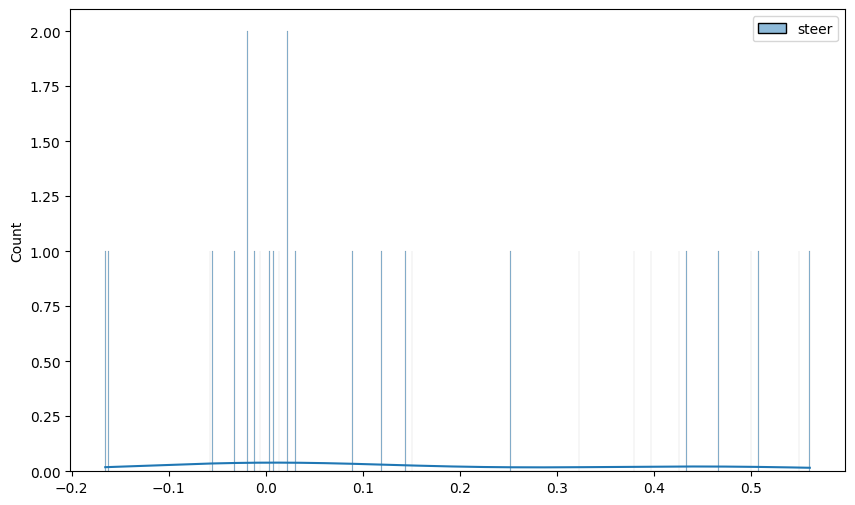

In [98]:
plt.figure(figsize=(10, 6))
sns.histplot(trough_data_segments, kde=True, bins=1000)

<Axes: ylabel='Count'>

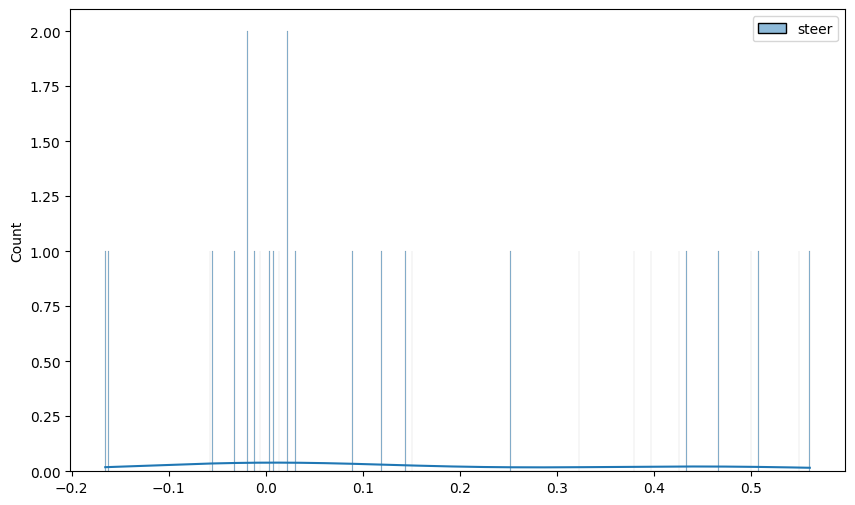

In [99]:
plt.figure(figsize=(10, 6))
sns.histplot(peak_data_segments, kde=True, bins=1000)

In [71]:
from scipy.signal import find_peaks, butter, filtfilt

# Apply a low-pass filter to reduce noise
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y


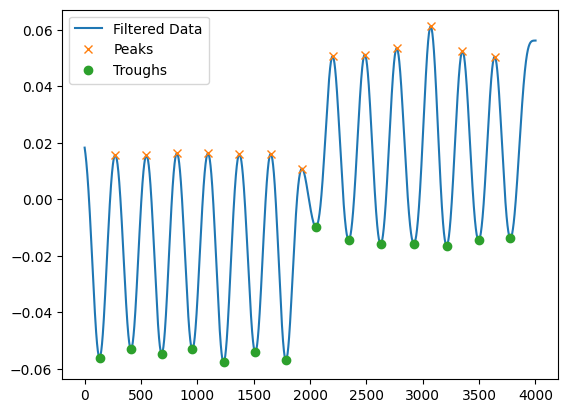

In [86]:
# Parameters for the low-pass filter
cutoff_frequency = 0.01  # Adjust cutoff frequency as needed
sampling_rate = 2  # Adjust the sampling rate as needed
filtered_data = butter_lowpass_filter(df["steer"], cutoff_frequency, sampling_rate)

# Detect peaks and troughs
peaks, _ = find_peaks(filtered_data)
troughs, _ = find_peaks(-filtered_data)

# Plot the data with peaks and troughs
plt.plot(filtered_data, label='Filtered Data')
plt.plot(peaks, filtered_data[peaks], "x", label='Peaks')
plt.plot(troughs, filtered_data[troughs], "o", label='Troughs')
plt.legend()
plt.show()